In [1]:
import torch as t
from NTS_prev import NTS
import matplotlib.pyplot as plt
from torch.optim import Adam

# Равномерное разбиение отрезка

In [2]:
n = 15

In [3]:
# r - разбиение, x - x_o из изначальной задачи
def function_uniform(x, r = t.linspace(0,1,n)):
    len_x = x.size()[0]
    g = t.ones(len_x)
    for i in range(len_x):
        # first = ( r[i+1].sub(x[i]) ).div( x[i].sub(r[i]) ).abs().log()
        first = t.log((r[i+1] - x[i]) / (x[i] - r[i])) 
        second = t.zeros(1)
        for k in range(len_x-1):
            if k!=i:
                second = second + t.log((r[k+1] - x[i]) / (r[k] - x[i])) + (x[k] - x[i]) * (1 / (r[k+1] - x[i]) - 1 / (r[k] - x[i]))
        g[i] = first + second
    return g    

In [5]:
def train_N(function, optimizer, x, epoch):
    
    loss_line = []
    
    x_last = t.zeros_like(x)
    
    eps = 100
    step = 0
    while step < epoch:
        f = (function(x) ** 2).sum()
        
        with t.no_grad():
            loss_line.append(f)
        
        with t.no_grad():
            x_last.copy_(x)
        
        optimizer.zero_grad()
        optimizer.step()
        
        eps = ((x - x_last) ** 2).sum().sqrt()
        step += 1
    
        #print(' ' * 60, end='\r')
        print('eps = {}  step = {}     '.format(eps, step), end='\r')
    
    print(' ' * 60, end='\r')
    print('eps = {} step = {} f = {}'.format(eps.tolist(), step, f))
    print(x.tolist())
        
    return loss_line

In [6]:
r = t.linspace(0,1,n)
x = r[:-1]+(r[1]-r[0])/4.0
x = t.tensor(x,  dtype= t.float32, requires_grad = True)

/home/yakub/Desktop/summer_project/env/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
#x = t.tensor([0.1, 0.2, 0.3, 0.4, 0.5], dtype= t.float32, requires_grad = True)
optimizer = NTS([x], function_uniform, epoch=10, adaptive_lr=True,adaptive_L=True, limit_L=1e-2, limit_recurse=4, lr=1e-2)
loss = train_N(function_uniform,optimizer,x,100) 

eps = 0.0 step = 100 f = 1.4690426652919086e-09             
[0.031601808965206146, 0.10765215754508972, 0.1784859448671341, 0.24999940395355225, 0.3214220702648163, 0.3928549885749817, 0.4642857015132904, 0.5357165336608887, 0.6071492433547974, 0.6785721778869629, 0.7500856518745422, 0.8209192752838135, 0.8969697952270508, 0.9672741293907166]


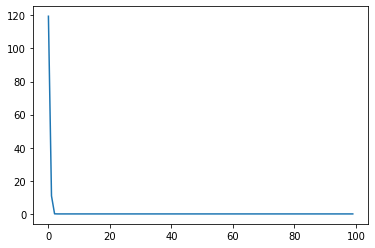

In [8]:
plt.plot(loss)

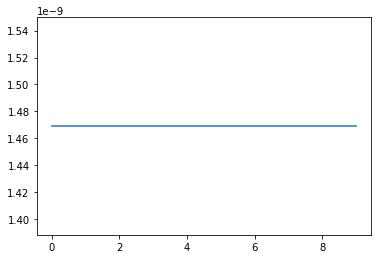

In [18]:
plt.plot(loss[-10:])

In [9]:
def train_s(function, optimizer, x, epoch):
    
    loss_line = []
    
    x_last = t.zeros_like(x)
    
    eps = 100
    step = 0
    while step < epoch:
        f = (function(x) ** 2).sum()
        
        with t.no_grad():
            loss_line.append(f)
        
        with t.no_grad():
            x_last.copy_(x)
        
        optimizer.zero_grad()
        f.backward()
        optimizer.step()
        
        eps = ((x - x_last) ** 2).sum().sqrt()
        step += 1
    
        #print(' ' * 60, end='\r')
        print('eps = {}  step = {}    '.format(eps, step), end='\r')
    
    print(' ' * 60, end='\r')
    print('eps = {} step = {} f = {}'.format(eps.tolist(), step, f))
    print(x.tolist())
        
    return loss_line

In [ ]:
r = t.linspace(0,1,n)
x = r[:-1]+(r[1]-r[0])/4.0
x = t.tensor(x,  dtype= t.float32, requires_grad = True)

In [ ]:
optimizer = Adam([x], lr=1e-3)
loss = train_s(function_uniform, optimizer, x, 100)

In [ ]:
plt.plot(loss)

# Неравномерное разбиение отрезка

In [10]:
import random

def generate_norm_split(n):
    
    n1 = n // 2
    n2 = n - n1
    
    r1 = t.randn(n1).abs() / 3
    r2 = 1 - t.randn(n2).abs() / 3
    
    return t.cat([r1, r2]).sort()[0]

def generate_norm_x(r):
    
    x = t.zeros_like(r[:-1])
    
    for i, _ in enumerate(x):
        x[i] = r[i] + (r[i + 1] - r[i]) / 4.
        
    return x

In [11]:
n = 15

In [12]:
# r - разбиение, x - x_o из изначальной задачи
def function_normal(x):
    
    global r
    
    len_x = x.size()[0]
    g = t.ones(len_x)
    for i in range(len_x):
        # first = ( r[i+1].sub(x[i]) ).div( x[i].sub(r[i]) ).abs().log()
        first = t.log((r[i+1] - x[i]) / (x[i] - r[i])) 
        second = t.zeros(1)
        for k in range(len_x-1):
            if k!=i:
                second = second + t.log((r[k+1] - x[i]) / (r[k] - x[i])) + (x[k] - x[i]) * (1 / (r[k+1] - x[i]) - 1 / (r[k] - x[i]))
        g[i] = first + second
    return g    

# Adam

In [13]:
r = generate_norm_split(n)
x0 = generate_norm_x(r)
print(r)
print(x0)

tensor([0.0020, 0.0066, 0.0162, 0.1699, 0.2441, 0.3130, 0.3937, 0.4062, 0.5299,
        0.6242, 0.6809, 0.8234, 0.8463, 0.8577, 0.9817])
tensor([0.0031, 0.0090, 0.0546, 0.1885, 0.2613, 0.3332, 0.3968, 0.4371, 0.5534,
        0.6384, 0.7166, 0.8291, 0.8491, 0.8887])


In [ ]:
x = t.zeros_like(x0, requires_grad=True)
with t.no_grad():
    x.copy_(x0)

In [ ]:
optimizer = Adam([x], lr=1e-4)
loss_Adam = train_s(function_normal, optimizer, x, 1000)

In [ ]:
plt.plot(loss_Adam[:100])

In [ ]:
plt.plot(loss_Adam[-100:])

# NTS

In [14]:
x = t.zeros_like(x0, requires_grad=True)
with t.no_grad():
    x.copy_(x0)

In [15]:
optimizer = NTS([x], function_normal, epoch=10, adaptive_lr=True,
                adaptive_L=True, limit_L=1e-2, limit_recurse=4, lr=1e-2)
loss_NTS = train_N(function_normal, optimizer ,x , 1000) 

eps = 7.786496098560747e-06 step = 1000 f = 0.49307671189308167
[0.002485999371856451, 0.007593323010951281, 0.07450233399868011, 0.21642354130744934, 0.278145432472229, 0.3538157641887665, 0.3990813195705414, 0.46164917945861816, 0.5835040807723999, 0.6508183479309082, 0.741588830947876, 0.8423823714256287, 0.8547035455703735, 0.9142261147499084]


In [41]:
print(x0)
print(r)

tensor([0.0031, 0.0090, 0.0546, 0.1885, 0.2613, 0.3332, 0.3968, 0.4371, 0.5534,
        0.6384, 0.7166, 0.8291, 0.8491, 0.8887])
tensor([0.0020, 0.0066, 0.0162, 0.1699, 0.2441, 0.3130, 0.3937, 0.4062, 0.5299,
        0.6242, 0.6809, 0.8234, 0.8463, 0.8577, 0.9817])


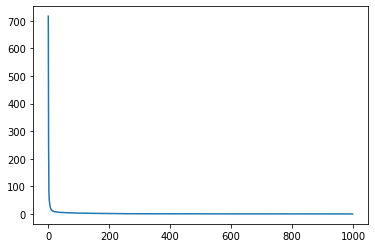

In [16]:
plt.plot(loss_NTS)

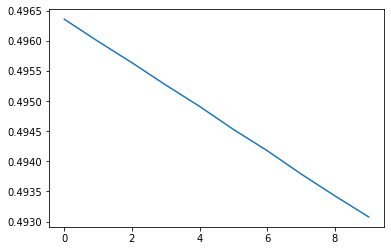

In [39]:
plt.plot(loss_NTS[-10:])

In [48]:
(x > r[:-1]) & (x < r[1:])

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True])

In [27]:
junc_line = []

In [28]:
junc_line

[]